In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# 定义函数
def f(x):
    Q = np.array([[1, 0], [0, 10]])
    return 0.5 * x.T @ Q @ x + 10

# 返回f(x)梯度值
def grad_f(x):
    Q = np.array([[1, 0], [0, 10]])
    return Q @ x

def plt_f(X, Y):
    x = np.array((X,Y))
    Q = np.array([[1, 0], [0, 10]])
    return 0.5 * x.T @ Q @ x + 10

In [27]:
# 作图方法，f(x)变化率和f(x)三维图像
def show_plt(x_list, y_list, f_list, S):
    plt.figure(figsize=(10,6))
    plt.plot(range(len(f_list)),f_list,'r')
    plt.title(S)
    plt.xlabel('Iterations')
    plt.ylabel('Function Value')
    # plt.show()

    fig = plt.figure()
    ax3d = fig.add_subplot(projection='3d')  #创建3d坐标系
    plt.rcParams['axes.unicode_minus'] = False

    Q = np.array([[1, 0], [0, 10]])
    x_range = np.linspace(-3,3,50)
    y_range = np.linspace(-3,3,50)
    X,Y = np.meshgrid(x_range, y_range)
    Z = 0.5 * (X*Q[0][0]*X + Y*Q[1][1]*Y) + 10
    ax3d.plot_surface(X,Y,Z)
    ax3d.scatter(x_list,y_list,f_list, c='r', marker='o')
    plt.show()

In [28]:
# 精确线搜索法
def line_search(x):
    Q = np.array([[1, 0], [0, 10]])

    # 第k步步长
    return np.linalg.norm(Q@x, ord=2)**2 / ((Q@x).T @ Q @ (Q @ x))

def Acc_line_search(x0):
    xi = x0

    # 结束条件
    tol = 1e-10
    pre_tol = 1

    cur_y = f(xi)
    max_iter = 1000

    # 存储数据
    x_list = [x0[0]]
    y_list = [x0[1]]
    f_list = [f(x0)]

    for i in range(0, max_iter):
        gi = grad_f(xi)

        # 更新步长和x的位置
        ti = line_search(xi)
        xi = xi - ti * gi
        x_list.append(xi[0])
        y_list.append(xi[1])

        pre_y = cur_y
        cur_y = f(xi)
        f_list.append(cur_y)
        pre_tol = abs(pre_y -  cur_y)
        if pre_tol < tol:
            break

    show_plt(x_list, y_list, f_list, 'Accurate line search')

In [29]:
# 固定步长法
def gradient_descent(x0):
    xi = x0
    L = 10

    # 结束条件
    tol = 1e-10
    pre_tol = 1
    
    cur_y = f(xi)
    max_iter = 1000

    # 存储数据
    x_list = [x0[0]]
    y_list = [x0[1]]
    f_list = [f(x0)]

    for i in range(0, max_iter):
        gi = grad_f(xi)

        # 更新x的位置
        ti = 1/L
        xi = xi - ti * gi
        x_list.append(xi[0])
        y_list.append(xi[1])

        pre_y = cur_y
        cur_y = f(xi)
        f_list.append(cur_y)
        pre_tol = abs(pre_y - cur_y)
        if pre_tol < tol:
            break

    show_plt(x_list, y_list,f_list, 'Gradient Descent')

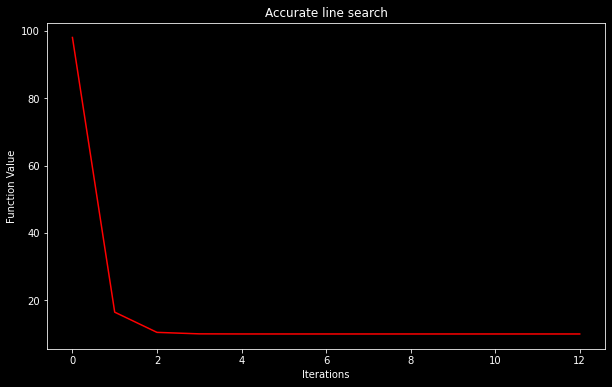

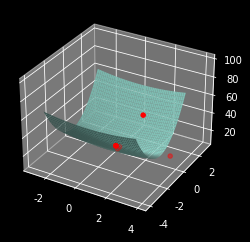

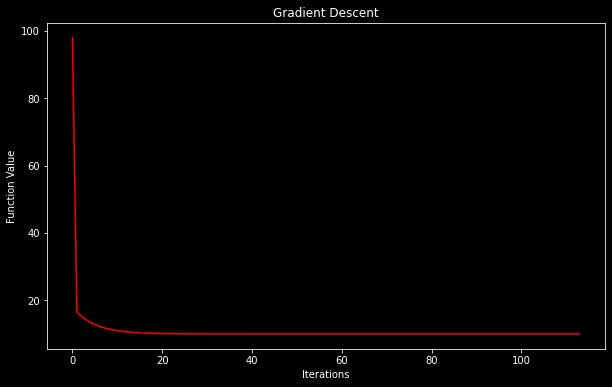

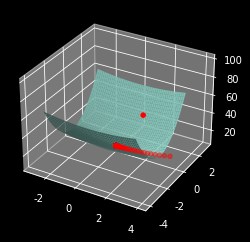

In [30]:
x0_1 = np.array([4.0, -4])
Acc_line_search(x0_1)
gradient_descent(x0_1)